In [1]:
import cv2  
import os 
import pandas as pd 
import glob 
import shutil
import json 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 


In [4]:
sample_annotatiom= '/home/saaho/THYTECH/HelmetDetection/HelmetDetection/Data/CaptureImageAnno/image_0.txt'

sample_image = '/home/saaho/THYTECH/HelmetDetection/HelmetDetection/Data/CaptureImages/image_0.jpg'

In [5]:
img =  cv2.imread(sample_image)
dh ,dw  , c = img.shape

In [6]:
dh , dw ,c

(480, 640, 3)

In [7]:
with open(sample_annotatiom ,'r') as file:
    annotation = file.readlines()




In [8]:
annotation

['0 0.692105 0.363158 0.410526 0.694737']

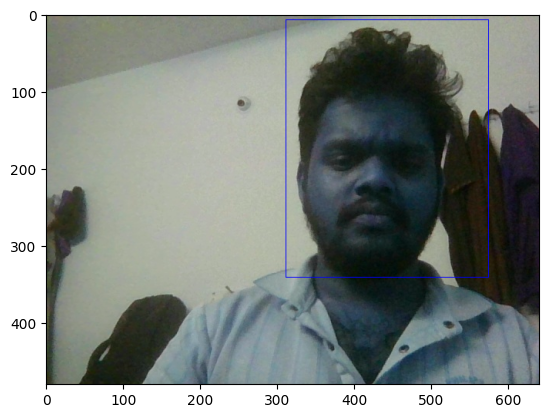

In [9]:
for d in annotation:
    label , x , y , w ,h  = map(float, d.split(' '))
        
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.show()

In [8]:
# Create the YOLO Dataset 

IMAGE_PATH  = '/home/saaho/THYTECH/HelmetDetection/HelmetDetection/Data/Dataset/DataV2_images'
LABEL_PATH = '/home/saaho/THYTECH/HelmetDetection/HelmetDetection/Data/Dataset/DataV2Labels'


In [9]:
if not os.path.exists(IMAGE_PATH) or not os.path.exists(LABEL_PATH):
    raise FileNotFoundError("Dataset file not found")



In [10]:
labels =  os.listdir(LABEL_PATH)

In [11]:
len(labels)

861

In [12]:
train  , test =  train_test_split(labels ,test_size= 0.15  , shuffle= True )
valid , test =  train_test_split(test,test_size=0.2 )
print(len(train) , len(test), len(valid)) 

731 26 104


In [13]:
labels[1][:-4]

'BikesHelmets626'

In [15]:
for split in ["train", "valid", "test"]:
    os.makedirs(f"{split}/images", exist_ok=True)
    os.makedirs(f"{split}/labels", exist_ok=True)


In [ ]:
def copy_file(files , dirname):
    for label_filename in labels:
        image_basename =  label_filename[:-4]
        image_candidate =  glob.glob(f"{IMAGE_PATH}/{image_basename}.*")

        if not image_candidate:
            print('No images is found')


        image_path =  image_candidate[0]
        image_filename   =  os.path.basename(image_path)

               
        shutil.copy(image_path, f"{dirname}/images/{image_filename}")
        shutil.copy(f"{LABEL_PATH}/{label_filename}", f"{dirname}/labels/{label_filename}")

In [18]:
copy_file(train, "train")
copy_file(valid, "valid")
copy_file(test, "test")

print("✅ Train-Test Split Done!")

✅ Train-Test Split Done!


In [21]:
import yaml 

data = {
    'train': '/home/saaho/THYTECH/HelmetDetection/HelmetDetection/train',
    'test': '/home/saaho/THYTECH/HelmetDetection/HelmetDetection/test',
    'valid': '/home/saaho/THYTECH/HelmetDetection/HelmetDetection/valid',
    'nc': 2 , 
    'names': ['Without Helmet', 'With Helmet'] 

}

with open('dataset.yaml' , 'w') as f:
    yaml.dump(data  ,f)

In [22]:
with open('dataset.yaml', 'r') as f:
    cont =  f.read()

print(cont) 

names:
- Without Helmet
- With Helmet
nc: 2
test: /home/saaho/THYTECH/HelmetDetection/HelmetDetection/test
train: /home/saaho/THYTECH/HelmetDetection/HelmetDetection/train
valid: /home/saaho/THYTECH/HelmetDetection/HelmetDetection/valid

